### Import

In [1]:
from collections import defaultdict

import networkx as nx
from node2vec import Node2Vec
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score, accuracy_score, f1_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from mj.utils import NODE2VEC_SEED, count_and_average_node_occurrences

In [2]:
months = ['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30']
graphs = []

for month in months:
    with open(f'../data/graphs/graph_{month}.pkl', 'rb') as f:
        g = pickle.load(f)
        graphs.append(g)
        print(f'For {month}: {g.edges}')

For 2015-01-31: [('AFG', 'PAK'), ('AFG', 'USA'), ('AFR', 'BDI'), ('AFR', 'DJI'), ('AFR', 'NGA'), ('AFR', 'SDN'), ('AFR', 'SOM'), ('AFR', 'USA'), ('AFR', 'ZAF'), ('ARE', 'AUS'), ('ARE', 'BHR'), ('ARM', 'BGR'), ('AUS', 'USA'), ('BFA', 'CIV'), ('BGD', 'IND'), ('BGD', 'USA'), ('BGR', 'FRA'), ('BLR', 'USA'), ('BLZ', 'ESP'), ('BLZ', 'USA'), ('BRA', 'IDN'), ('CAN', 'CHN'), ('CAN', 'SAU'), ('CAN', 'SEA'), ('CAN', 'UKR'), ('CAN', 'USA'), ('CHE', 'SGP'), ('CHE', 'USA'), ('CHL', 'USA'), ('CHN', 'CMR'), ('CHN', 'COL'), ('CHN', 'EGY'), ('CHN', 'JPN'), ('CHN', 'KOR'), ('CHN', 'PAK'), ('CHN', 'RUS'), ('CHN', 'SEA'), ('CHN', 'TWN'), ('CHN', 'USA'), ('COD', 'COG'), ('COD', 'USA'), ('COK', 'USA'), ('COL', 'USA'), ('CUB', 'FRA'), ('CUB', 'NMR'), ('CUB', 'USA'), ('CUB', 'ZAF'), ('DEU', 'EUR'), ('DEU', 'MDV'), ('DEU', 'POL'), ('DEU', 'RUS'), ('DEU', 'SGP'), ('DEU', 'SYR'), ('DEU', 'USA'), ('ECU', 'SWE'), ('EGY', 'GMB'), ('EGY', 'MYS'), ('EGY', 'USA'), ('ERI', 'ISR'), ('ESP', 'KOR'), ('ESP', 'USA'), ('ESP',

In [3]:
graphs

In [4]:
january_node2vec = Node2Vec(graphs[0], dimensions=64, walk_length=30, num_walks=100, workers=4)
january_model = january_node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

In [5]:
february_node2vec = Node2Vec(graphs[1], dimensions=64, walk_length=30, num_walks=100, workers=4)
february_model = february_node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

In [6]:
march_node2vec = Node2Vec(graphs[2], dimensions=64, walk_length=30, num_walks=100, workers=4)
march_model = march_node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

In [7]:
april_node2vec = Node2Vec(graphs[3], dimensions=64, walk_length=30, num_walks=100, workers=4)
april_model = april_node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

In [8]:
april_node2vec.walks

[['BDI',
  'USA',
  'SWZ',
  'USA',
  'BGR',
  'HRV',
  'BGR',
  'HUN',
  'BGR',
  'CHE',
  'NGA',
  'NLD',
  'CHN',
  'ITA',
  'NGA',
  'GHA',
  'TUR',
  'IND',
  'DEU',
  'UKR',
  'AUS',
  'NLD',
  'DNK',
  'FRA',
  'BLR',
  'CHN',
  'UKR',
  'IRN',
  'UZB',
  'CHN'],
 ['JAM',
  'NIC',
  'DEU',
  'WAF',
  'ZAF',
  'SAF',
  'ZWE',
  'KOR',
  'ESP',
  'FIN',
  'POL',
  'IDN',
  'SWE',
  'LVA',
  'WST',
  'AZE',
  'FRA',
  'CZE',
  'SVK',
  'SRB',
  'USA',
  'SAM',
  'VEN',
  'CUB',
  'ESP',
  'KOR',
  'BRA',
  'WST',
  'MEA',
  'TJK'],
 ['GIN',
  'MAR',
  'SSD',
  'MAR',
  'DNK',
  'FRA',
  'MOZ',
  'FRA',
  'AZE',
  'KWT',
  'YEM',
  'IRL',
  'HRV',
  'BGR',
  'CAN',
  'IND',
  'TUR',
  'SEN',
  'ESP',
  'KOR',
  'CAN',
  'BHS',
  'NIC',
  'HND',
  'GTM',
  'HND',
  'GTM',
  'USA',
  'KHM',
  'GBR'],
 ['WSM',
  'SEA',
  'RUS',
  'PAK',
  'ZAF',
  'ZWE',
  'VNM',
  'FRA',
  'MEX',
  'ESP',
  'GUY',
  'NPL',
  'SAS',
  'IRQ',
  'NLD',
  'GIN',
  'CAN',
  'THA',
  'BGD',
  'THA',
  'BGD'

In [9]:
print(len(graphs[0].nodes) == len(graphs[1].nodes) == len(graphs[2].nodes) == len(graphs[3].nodes))

True


In [10]:
ser1 = pd.Series([n for n in graphs[0].nodes])
ser2 = pd.Series([n for n in graphs[1].nodes])
ser3 = pd.Series([n for n in graphs[2].nodes])
ser4 = pd.Series([n for n in graphs[3].nodes])
intersection_set = set(ser1).intersection(set(ser2)).intersection(set(ser3)).intersection(set(ser4))

In [11]:
intersection_set

{'ABW',
 'AFG',
 'AFR',
 'AGO',
 'AIA',
 'ALB',
 'AND',
 'ARE',
 'ARG',
 'ARM',
 'ASA',
 'ATG',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHR',
 'BHS',
 'BLR',
 'BLZ',
 'BMU',
 'BOL',
 'BRA',
 'BRB',
 'BRN',
 'BTN',
 'BWA',
 'CAF',
 'CAN',
 'CAS',
 'CAU',
 'CHE',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'COD',
 'COG',
 'COK',
 'COL',
 'COM',
 'CPV',
 'CRB',
 'CRI',
 'CUB',
 'CYM',
 'CYP',
 'CZE',
 'DEU',
 'DJI',
 'DMA',
 'DNK',
 'DOM',
 'DZA',
 'EAF',
 'ECU',
 'EGY',
 'ERI',
 'ESP',
 'EST',
 'ETH',
 'EUR',
 'FIN',
 'FJI',
 'FRA',
 'FSM',
 'GAB',
 'GBR',
 'GEO',
 'GHA',
 'GIN',
 'GMB',
 'GNB',
 'GNQ',
 'GRC',
 'GRD',
 'GTM',
 'GUY',
 'HKG',
 'HND',
 'HRV',
 'HTI',
 'HUN',
 'IDN',
 'IND',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KHM',
 'KIR',
 'KNA',
 'KOR',
 'KWT',
 'LAM',
 'LAO',
 'LBN',
 'LBR',
 'LBY',
 'LCA',
 'LIE',
 'LKA',
 'LSO',
 'LTU',
 'LUX',
 'LVA',
 'MAC',
 'MAR',
 'MCO',
 'MDA',
 'MDG',
 'MDV',


In [12]:
avg_vectors = dict()
for node in graphs[3].nodes:
    avg_vector = []
    for i in range(64):
        avg_vector.append((january_model.wv[node][i] + february_model.wv[node][i] + march_model.wv[node][i] + april_model.wv[node][i]) / 4)
    avg_vectors[node] = avg_vector

In [13]:
graphs[0].nodes


NodeView(('ABW', 'AFG', 'AFR', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASA', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CAS', 'CAU', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COK', 'COL', 'COM', 'CPV', 'CRB', 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'EAF', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'EUR', 'FIN', 'FJI', 'FRA', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GTM', 'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAM', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEA', 'MEX', 'MHL', 'MKD', 'MLI', 'MLT', 'MMR', 'MNG', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'NAF', 'NAM', 'NER', 'NG

In [14]:
january_model.wv['USA']

array([ 0.14261411, -0.31918943,  0.01158054,  0.26424125, -0.14388853,
       -0.4055142 , -0.05681823,  0.01454256, -0.03444551,  0.29620448,
        0.554914  ,  0.13913527, -0.01921246, -0.4574533 , -0.10295758,
       -0.01738422,  0.30808562,  0.105193  , -0.13746761,  0.21479526,
        0.25983888, -0.11915552,  0.21952906, -0.19182977,  0.06241427,
        0.42493424, -0.2750186 , -0.0220849 ,  0.04075118, -0.05044274,
       -0.21994962, -0.01560089, -0.3673985 ,  0.16972809, -0.26332203,
       -0.2951002 ,  0.18995996, -0.03584699,  0.29938614, -0.19391751,
        0.32597268,  0.35816443, -0.06084248,  0.09410525,  0.1662397 ,
       -0.36592224, -0.00780377,  0.00960971, -0.07008937, -0.58370495,
        0.5271362 , -0.57540023,  0.13401233,  0.4693765 ,  0.2289489 ,
       -0.42272282,  0.00681539, -0.18658462, -0.36361575,  0.25198346,
       -0.02247155, -0.18863685,  0.17463249, -0.01461601], dtype=float32)

In [15]:
len(avg_vectors['USA'])

64

### Scalar product of two vectors for link prediction

In [16]:
dot_products = dict()
for node1 in avg_vectors:
    for node2 in avg_vectors:
        if node1 != node2:
            vector1 = np.array(avg_vectors[node1])
            vector2 = np.array(avg_vectors[node2])
            n_sorted = sorted([node1, node2])
            dot_products[f'{n_sorted[0]}-{n_sorted[1]}'] = np.dot(vector1, vector2)

In [17]:
dot_products

{'ABW-AFG': 0.0018652453206139995,
 'ABW-AFR': -0.004216034607419197,
 'ABW-AGO': -4.719008706841879e-05,
 'ABW-AIA': -0.0008533262285687551,
 'ABW-ALB': -0.00566212831137388,
 'ABW-AND': -0.0034419510487423777,
 'ABW-ARE': 0.005901283768208516,
 'ABW-ARG': -0.0023519581673376,
 'ABW-ARM': 0.0005999146763855136,
 'ABW-ASA': 0.0017802947803728974,
 'ABW-ATG': -0.0004246530313551256,
 'ABW-AUS': 0.005683890839167317,
 'ABW-AUT': -0.001925109501941288,
 'ABW-AZE': -0.005879174137349654,
 'ABW-BDI': -0.003412862032853679,
 'ABW-BEL': 0.00018018694384304814,
 'ABW-BEN': -0.0029751858665156526,
 'ABW-BFA': -0.003449674774674452,
 'ABW-BGD': -0.0013904261278272984,
 'ABW-BGR': -0.003965551015694541,
 'ABW-BHR': 0.005005739491202679,
 'ABW-BHS': -0.0008858738809929935,
 'ABW-BLR': -0.001939696130047651,
 'ABW-BLZ': 0.00041145974735476605,
 'ABW-BMU': 0.0028839634932440496,
 'ABW-BOL': -0.0023587369149287293,
 'ABW-BRA': -0.003990434526044962,
 'ABW-BRB': 0.0012984102010511816,
 'ABW-BRN': -0.0

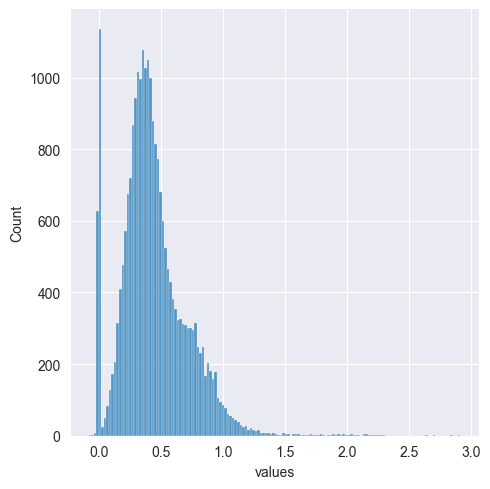

In [18]:
sns.displot(pd.DataFrame({'values':dot_products.values()}), x='values')

### Testing with different values of threshold

In [19]:
with open(f'../data/graphs/graph_2015-05-31.pkl', 'rb') as f:
        g = pickle.load(f)
        graphs.append(g)
        print(g.edges(data=True))

[('ABW', 'NLD', {'weight': 0.32994957983193246}), ('ABW', 'USA', {'weight': 5.517460317460318}), ('AFG', 'ARE', {'weight': -7.074291938997822}), ('AFG', 'AUS', {'weight': -2.72696614925925}), ('AFG', 'BRA', {'weight': -7.4195652173913045}), ('AFG', 'CAN', {'weight': 0.3140187736037181}), ('AFG', 'CAS', {'weight': 5.007946154621764}), ('AFG', 'CHN', {'weight': 1.4252879298751775}), ('AFG', 'DEU', {'weight': 2.729558020672221}), ('AFG', 'EGY', {'weight': -1.7264969559745413}), ('AFG', 'EUR', {'weight': -5.204718808983901}), ('AFG', 'FRA', {'weight': -2.489670234468934}), ('AFG', 'GBR', {'weight': -5.47716092757292}), ('AFG', 'HRV', {'weight': 1.611537308042588}), ('AFG', 'IDN', {'weight': 0.38000000000000006}), ('AFG', 'IND', {'weight': 1.3917199017199018}), ('AFG', 'IRN', {'weight': 0.08018590996540487}), ('AFG', 'ITA', {'weight': 1.251977401129944}), ('AFG', 'JOR', {'weight': 1.664864864864866}), ('AFG', 'JPN', {'weight': -8.0}), ('AFG', 'KAZ', {'weight': 1.2743687280737526}), ('AFG', 

In [20]:
actual_and_predicted_values = dict()
for edge in g.edges(data=True):
    node1, node2 = edge[0], edge[1]
    n_sorted = sorted([node1, node2])
    e = f'{n_sorted[0]}-{n_sorted[1]}'
    if e in dot_products:
        # threshold = 0.1
        actual_and_predicted_values[e] = (1 if edge[2]['weight'] >= 0 else 0, dot_products[e])

In [21]:
actual = [el[0] for el in actual_and_predicted_values.values()]
predicted = [el[1] for el in actual_and_predicted_values.values()]
'''recall = recall_score(actual, predicted)
acc = accuracy_score(actual, predicted)
print('Recall:', recall, 'Accuracy:', acc)'''

"recall = recall_score(actual, predicted)\nacc = accuracy_score(actual, predicted)\nprint('Recall:', recall, 'Accuracy:', acc)"

In [22]:
print(len(actual))

2467


In [23]:
print(len([el for el in actual if el == 0]))
print(len([el for el in actual if el == 1]))


603
1864


In [24]:
print(len([el for el in predicted if el == 0]))
print(len([el for el in predicted if el == 1]))

0
0


In [25]:
X = predicted
y = actual
len(X) == len(y)
    

True

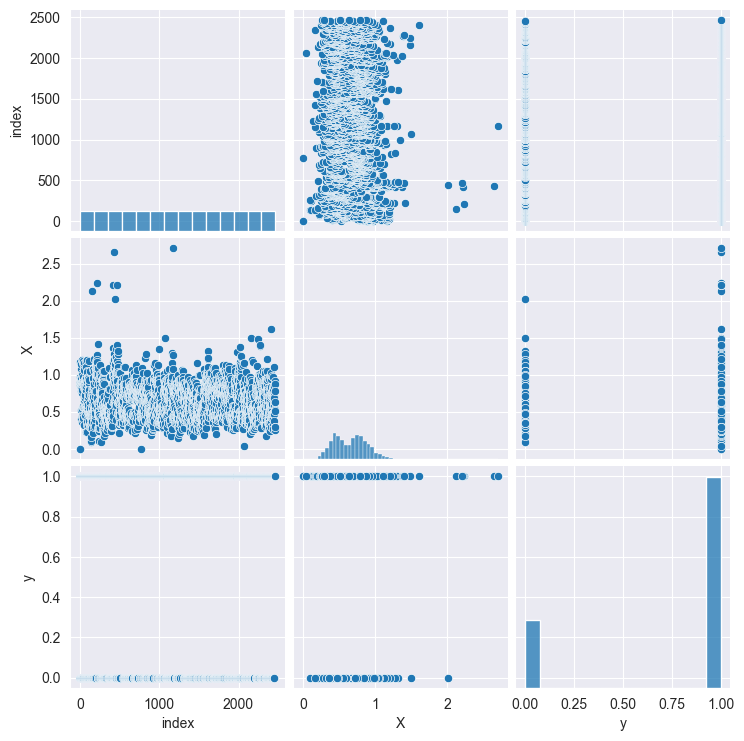

In [26]:
data = pd.DataFrame({'X': X, 'y': y}).reset_index()
sns.pairplot(data)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['y'], test_size=0.3, random_state=42)

In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7773279352226721


In [29]:
print('Recall', recall_score(y_test, predictions))

Recall 1.0


In [30]:
print('F1-score', f1_score(y_test, predictions))

F1-score 0.8747152619589977


# Experiment with Node2Vec parameteres

In [31]:
w_length, n_walks = 5, 20
# we are using the same seed for reproducibility
j_nv = Node2Vec(graphs[0], dimensions=64, walk_length=w_length, num_walks=n_walks, seed=NODE2VEC_SEED)
j_model = j_nv.fit(window=10, min_count=1, batch_words=4)
f_nv = Node2Vec(graphs[1], dimensions=64, walk_length=w_length, num_walks=n_walks, seed=NODE2VEC_SEED)
f_model = f_nv.fit(window=10, min_count=1, batch_words=4)
m_nv = Node2Vec(graphs[2], dimensions=64, walk_length=w_length, num_walks=n_walks, seed=NODE2VEC_SEED)
m_model = m_nv.fit(window=10, min_count=1, batch_words=4)
a_nv = Node2Vec(graphs[3], dimensions=64, walk_length=w_length, num_walks=n_walks, seed=NODE2VEC_SEED)
a_model = a_nv.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 20/20 [00:00<00:00, 869.57it/s]


Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 20/20 [00:00<00:00, 322.69it/s]


Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 20/20 [00:00<00:00, 243.91it/s]


Computing transition probabilities:   0%|          | 0/222 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 20/20 [00:00<00:00, 251.54it/s]


In [32]:
n_vecs = [j_nv, f_nv, m_nv, a_nv]

In [33]:
nodes = graphs[0].nodes

In [34]:
nodes_enc = {node: idx for idx, node in enumerate(nodes)}

In [35]:
nodes_enc

{'ABW': 0,
 'AFG': 1,
 'AFR': 2,
 'AGO': 3,
 'AIA': 4,
 'ALB': 5,
 'AND': 6,
 'ARE': 7,
 'ARG': 8,
 'ARM': 9,
 'ASA': 10,
 'ATG': 11,
 'AUS': 12,
 'AUT': 13,
 'AZE': 14,
 'BDI': 15,
 'BEL': 16,
 'BEN': 17,
 'BFA': 18,
 'BGD': 19,
 'BGR': 20,
 'BHR': 21,
 'BHS': 22,
 'BLR': 23,
 'BLZ': 24,
 'BMU': 25,
 'BOL': 26,
 'BRA': 27,
 'BRB': 28,
 'BRN': 29,
 'BTN': 30,
 'BWA': 31,
 'CAF': 32,
 'CAN': 33,
 'CAS': 34,
 'CAU': 35,
 'CHE': 36,
 'CHL': 37,
 'CHN': 38,
 'CIV': 39,
 'CMR': 40,
 'COD': 41,
 'COG': 42,
 'COK': 43,
 'COL': 44,
 'COM': 45,
 'CPV': 46,
 'CRB': 47,
 'CRI': 48,
 'CUB': 49,
 'CYM': 50,
 'CYP': 51,
 'CZE': 52,
 'DEU': 53,
 'DJI': 54,
 'DMA': 55,
 'DNK': 56,
 'DOM': 57,
 'DZA': 58,
 'EAF': 59,
 'ECU': 60,
 'EGY': 61,
 'ERI': 62,
 'ESP': 63,
 'EST': 64,
 'ETH': 65,
 'EUR': 66,
 'FIN': 67,
 'FJI': 68,
 'FRA': 69,
 'FSM': 70,
 'GAB': 71,
 'GBR': 72,
 'GEO': 73,
 'GHA': 74,
 'GIN': 75,
 'GMB': 76,
 'GNB': 77,
 'GNQ': 78,
 'GRC': 79,
 'GRD': 80,
 'GTM': 81,
 'GUY': 82,
 'HKG': 83,
 '

In [36]:
averaged_counts = count_and_average_node_occurrences(n_vecs, nodes)

In [37]:
averaged_counts['USA']

{'EGY': 1.0,
 'USA': 1.24,
 'CHE': 1.0,
 'IRN': 1.0,
 'EUR': 1.1111111111111112,
 'TUR': 1.0,
 'SOM': 1.0,
 'ESP': 1.0,
 'KOR': 1.0,
 'CHN': 1.2,
 'JPN': 1.0,
 'FRA': 1.2,
 'CAN': 1.0,
 'CMR': 1.0,
 'KEN': 1.0909090909090908,
 'JOR': 1.3333333333333333,
 'RUS': 1.0,
 'ISR': 1.0,
 'AFG': 1.0,
 'NZL': 1.0,
 'GRC': 1.0,
 'FJI': 1.0,
 'TZA': 1.0,
 'UKR': 1.0,
 'LTU': 1.0,
 'PAK': 2.0,
 'SAU': 1.0,
 'GHA': 1.0,
 'IRQ': 1.0,
 'OMN': 2.0,
 'MLT': 1.0,
 'ALB': 1.0,
 'BHR': 1.0,
 'EAF': 1.0,
 'ETH': 1.0,
 'PGS': 1.0,
 'LBY': 1.0,
 'MRT': 1.0,
 'MUS': 1.0,
 'RWA': 1.0,
 'ZAF': 1.0,
 'AFR': 1.0,
 'KAZ': 1.0,
 'DEU': 1.0,
 'GBR': 1.1666666666666667,
 'JAM': 1.0,
 'BRN': 1.0,
 'NPL': 1.0,
 'VEN': 1.0,
 'DZA': 1.0,
 'EST': 1.0,
 'KHM': 1.0,
 'WST': 1.0,
 'HUN': 1.0,
 'UGA': 1.0,
 'HTI': 1.0,
 'VNM': 1.0,
 'LBN': 1.0,
 'MEX': 1.0,
 'TTO': 1.0,
 'ECU': 1.0,
 'COL': 1.0,
 'ASA': 1.0,
 'ITA': 1.0,
 'QAT': 1.0,
 'SGP': 1.0,
 'MYS': 1.0,
 'LVA': 1.0,
 'LCA': 1.0,
 'TWN': 1.0,
 'ATG': 1.0,
 'BLZ': 1.0,
 'G

In [38]:
# num_appearances = [[0 for _ in range(len(nodes_enc))] for _ in range(len(nodes_enc))]

In [39]:
# len(num_appearances)

In [40]:
# appearances_per_month = {}
# months = ['jan', 'feb', 'mar', 'apr']
# for m in months:
#     appearances_per_month[m] = None
# for month, m_name in zip(n_vecs, months):
#     num_appearances = [[0 for _ in range(len(nodes_enc.keys()))] for _ in range(len(nodes_enc.keys()))]
#     for node in nodes:
#         walks = [el for el in month.walks if el[0] == node]
#         for walk in walks:
#             unique_nodes = set(walk)
#             for u_node in unique_nodes:
#                 num_appearances[nodes_enc[node]][nodes_enc[u_node]] += 1 
#         num_appearances[nodes_enc[node]] = np.array(num_appearances[nodes_enc[node]]).reshape(-1, 1)
#         scaler = MinMaxScaler()
#         num_appearances[nodes_enc[node]] = scaler.fit_transform(num_appearances[nodes_enc[node]]).reshape(1, -1)[0]
#     appearances_per_month[m_name] = num_appearances

In [41]:
# appearances_per_month['apr'][97]

In [42]:
# num_appearances[165][97]

In [43]:
# nodes_enc['RUS']

In [44]:
# nodes_enc['JO']

Key: USA-RUS Value:

In [45]:
# [el for el in a_nv.walks if el[0] == 'JOR']